# Battery Stuff...

Edgar Hernandez

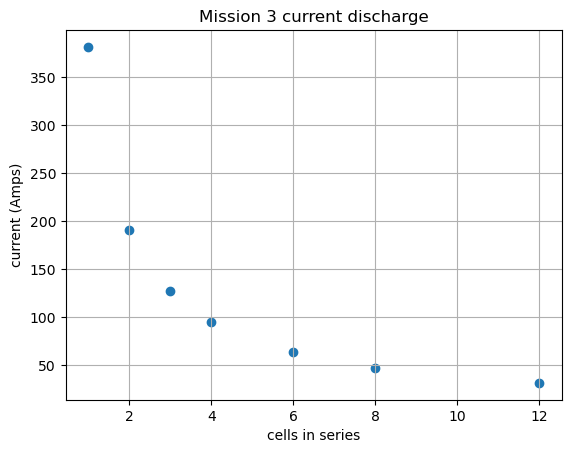

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from propeller_analysis import PropellerAnalysis

yaml_dir='docs/props/new_yaml'
my_props=[
    'apce_20x10_4025.yaml',
    'apce_21x13_2043.yaml',
    'apce_18x10_5003.yaml',
    # 'apce_18x12_4017.yaml',
    # 'apce_18x8_5028.yaml'
]
banner_data='docs/isaac_banner_data_1.yaml'

shaft_power=1200/0.85
batts = np.array([1,2,3,4,6,8,12])
volts = batts*3.7
amps = shaft_power/volts

plt.figure()
plt.scatter(batts, amps, label='towing cruise')
plt.xlabel('cells in series')
plt.ylabel('current (Amps)')
plt.title('Mission 3 current discharge')
plt.grid('on')

/opt/homebrew/Caskroom/miniconda/base/envs/dbf/lib/python3.13/site-packages/scipy/interpolate/_interpolate.py:497: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


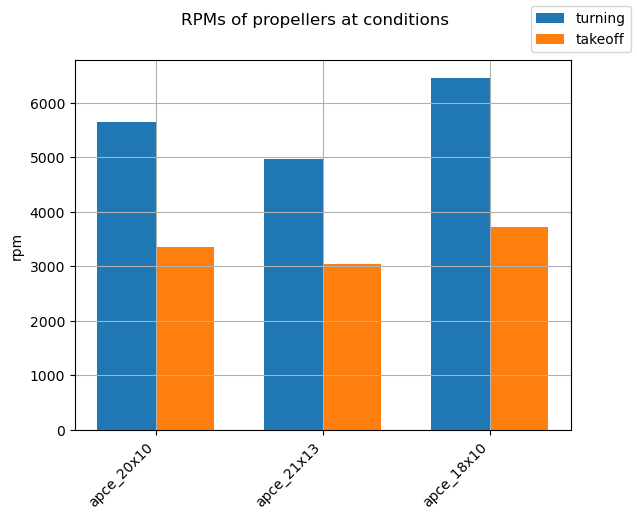

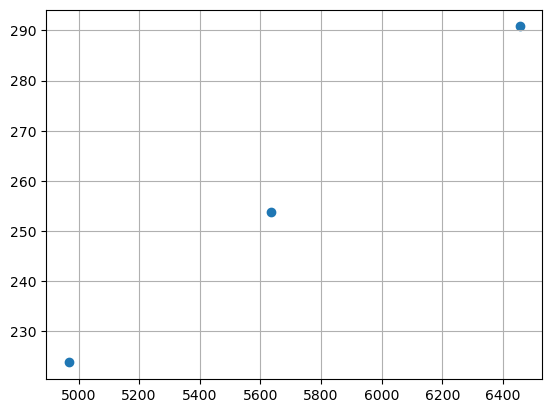

In [ ]:
props=[]
power=[]
energies=[]
rpms=[]
drags=[]
labels=[]
rpms_tof=[]

power_tof = 404*0.4
for prop in my_props:
    path=os.path.join(yaml_dir,prop)
    panl=PropellerAnalysis(path,banner_path=banner_data)
    l, vcruise, data = panl.size_banner(iterations=50)
    en, _,_ = panl.energy_from_banner(banner=l)
    
    shaft_power=data[5]
    omega = data[7]
    v_tof = data[9]
    drag_tof= power_tof/v_tof
    _,_,_,omega_tof = panl.analysis(
        airspeed=v_tof,
        drag=drag_tof
    )

    props.append(shaft_power)
    power.append(data[5])
    energies.append(en)
    rpms.append(omega*60/2/np.pi)
    drags.append(data[8])
    labels.append(panl.label)
    rpms_tof.append(omega_tof*60/2/np.pi)


batt = 6*3.7
throttle=0.8
volt_motor = batt*throttle
kv=np.asarray(rpms)/volt_motor

x=np.arange(len(labels))
width=0.35
f1=plt.figure()
a1=f1.add_subplot(1,1,1)
a1.bar(x-width/2, rpms, width=width,label='turning')
a1.bar(x+width/2, rpms_tof, width=width, label='takeoff')
plt.setp(a1.get_xticklabels(),rotation=45,ha='right')
a1.set_xticks(x)
a1.set_xticklabels(labels)
a1.set_ylabel('rpm')
f1.suptitle('RPMs of propellers at conditions')
f1.legend()

plt.figure()
plt.scatter(rpms,kv)

# kvs=